In [214]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from IPython.display import display, HTML

In [215]:
import warnings
warnings.filterwarnings('ignore')

In [300]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [216]:
relevant_cols = [
    "edad",
    "imc",
    "f_diag",
    "tipo_histologico",
    "Grado",
    "valor_de_ca125",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "fecha_qx",
    "asa",
    "histo_defin",
    "grado_histologi",
    "tamano_tumoral",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "recep_est_porcent",
    "rece_de_Ppor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "recidiva",
    "rdt",
]

In [217]:
data = pd.read_csv("../data_source/IQ_Cancer_Endometrio_merged_NMS.csv")
data_relevant = data[relevant_cols]
data_relevant.head()

edad    imc      f_diag  tipo_histologico  Grado  valor_de_ca125  \
0  68.0  39.40  2023-11-03                 2      2           283.0   
1  92.0  24.14  2019-10-24                 1      1             NaN   
2  72.0  38.80  2020-07-16                 2      1             NaN   
3  78.0  36.30  2021-02-22                 2      1             NaN   
4  68.0  31.10  2019-11-15                 2      1             NaN   

   ecotv_infiltobj  ecotv_infiltsub  metasta_distan  estadiaje_pre_i  ...  \
0              4.0              2.0             1.0              2.0  ...   
1              3.0              4.0             0.0              NaN  ...   
2              3.0              4.0             0.0              0.0  ...   
3              3.0              3.0             0.0              1.0  ...   
4              NaN              3.0             0.0              0.0  ...   

   estudio_genetico_r05  estudio_genetico_r06 estadificacion_  FIGO2023  \
0                   0.0                   1.0             9.0      14.0   
1                   0.0                   1.0             NaN       NaN   
2                   0.0                   1.0             1.0       1.0   
3                   0.0                   1.0             7.0      11.0   
4                   0.0                   1.0             1.0       1.0   

   grupo_de_riesgo_definitivo  bqt   qt  Tributaria_a_Radioterapia  recidiva  \
0                         5.0  0.0  1.0                        0.0         0   
1                         NaN  NaN  NaN                        NaN         0   
2                         1.0  0.0  0.0                        0.0         0   
3                         5.0  1.0  1.0                        1.0         1   
4                         1.0  0.0  0.0                        0.0         0   

   rdt  
0  NaN  
1  NaN  
2  NaN  
3  2.0  
4  NaN  

[5 rows x 38 columns]

In [218]:
data_relevant.describe().T

count        mean         std   min    25%   50%  \
edad                        163.0   62.190184   14.524374   0.0  54.00  63.0   
imc                         155.0   30.726258    7.738904  16.7  24.40  29.4   
tipo_histologico            163.0    4.171779   11.696045   1.0   2.00   2.0   
Grado                       163.0    1.190184    0.393656   1.0   1.00   1.0   
valor_de_ca125               21.0  148.671429  324.352458   3.7  19.30  30.1   
ecotv_infiltobj             157.0    3.331210    1.064512   1.0   3.00   4.0   
ecotv_infiltsub             162.0    2.629630    0.848007   1.0   2.00   2.5   
metasta_distan              159.0    0.056604    0.231814   0.0   0.00   0.0   
estadiaje_pre_i             160.0    0.368750    0.732205   0.0   0.00   0.0   
grupo_riesgo                161.0    1.515528    0.725479   1.0   1.00   1.0   
tto_NA                      163.0    0.018405    0.134825   0.0   0.00   0.0   
asa                         144.0    1.194444    0.532546   0.0   1.00   1.0   
histo_defin                 151.0    2.827815    2.128416   1.0   2.00   2.0   
grado_histologi             145.0    1.206897    0.406485   1.0   1.00   1.0   
tamano_tumoral              132.0    3.829924    4.551802   0.0   1.75   3.0   
afectacion_linf             144.0    0.208333    0.407534   0.0   0.00   0.0   
AP_centinela_pelvico        132.0    2.810606    1.808093   0.0   0.00   4.0   
AP_ganPelv                   55.0    0.563636    1.166883   0.0   0.00   0.0   
AP_glanPaor                  32.0    0.656250    1.207754   0.0   0.00   0.0   
recep_est_porcent            91.0   76.329670   27.057574   0.0  70.00  90.0   
rece_de_Ppor                 89.0   69.528090   30.671311   0.0  60.00  80.0   
beta_cateninap              151.0    0.860927    0.902144   0.0   0.00   1.0   
estudio_genetico_r01        154.0    0.045455    0.208979   0.0   0.00   0.0   
estudio_genetico_r02        154.0    0.006494    0.080582   0.0   0.00   0.0   
estudio_genetico_r03        154.0    0.006494    0.080582   0.0   0.00   0.0   
estudio_genetico_r04        154.0    0.006494    0.080582   0.0   0.00   0.0   
estudio_genetico_r05        154.0    0.019481    0.138657   0.0   0.00   0.0   
estudio_genetico_r06        154.0    0.935065    0.247215   0.0   1.00   1.0   
estadificacion_             139.0    2.467626    2.488531   1.0   1.00   1.0   
FIGO2023                    142.0    3.704225    4.073420   1.0   1.00   1.0   
grupo_de_riesgo_definitivo  143.0    1.965035    1.396235   1.0   1.00   1.0   
bqt                         154.0    0.279221    0.450080   0.0   0.00   0.0   
qt                          153.0    0.209150    0.408038   0.0   0.00   0.0   
Tributaria_a_Radioterapia   155.0    0.232258    0.423642   0.0   0.00   0.0   
recidiva                    163.0    0.288344    0.563542   0.0   0.00   0.0   
rdt                          33.0    1.030303    0.529437   0.0   1.00   1.0   

                              75%     max  
edad                        72.00    92.0  
imc                         35.30    56.1  
tipo_histologico             2.00    88.0  
Grado                        1.00     2.0  
valor_de_ca125              93.80  1486.9  
ecotv_infiltobj              4.00     4.0  
ecotv_infiltsub              3.00     4.0  
metasta_distan               0.00     1.0  
estadiaje_pre_i              0.00     2.0  
grupo_riesgo                 2.00     3.0  
tto_NA                       0.00     1.0  
asa                          2.00     2.0  
histo_defin                  2.00     9.0  
grado_histologi              1.00     2.0  
tamano_tumoral               4.00    38.0  
afectacion_linf              0.00     1.0  
AP_centinela_pelvico         4.00     4.0  
AP_ganPelv                   0.00     3.0  
AP_glanPaor                  0.25     3.0  
recep_est_porcent           90.00   100.0  
rece_de_Ppor                90.00   100.0  
beta_cateninap               2.00     2.0  
estudio_genetico_r01         0.00     1.0  
estudio_gen

In [219]:
data_relevant.isnull().sum()

edad                            0
imc                             8
f_diag                          2
tipo_histologico                0
Grado                           0
valor_de_ca125                142
ecotv_infiltobj                 6
ecotv_infiltsub                 1
metasta_distan                  4
estadiaje_pre_i                 3
grupo_riesgo                    2
tto_NA                          0
fecha_qx                       12
asa                            19
histo_defin                    12
grado_histologi                18
tamano_tumoral                 31
afectacion_linf                19
AP_centinela_pelvico           31
AP_ganPelv                    108
AP_glanPaor                   131
recep_est_porcent              72
rece_de_Ppor                   74
beta_cateninap                 12
estudio_genetico_r01            9
estudio_genetico_r02            9
estudio_genetico_r03            9
estudio_genetico_r04            9
estudio_genetico_r05            9
estudio_geneti

In [220]:
len(data_relevant)

163

In [221]:
data_relevant = data_relevant[data_relevant["recidiva"] != 2]
data_relevant = data_relevant[data_relevant["edad"] != 0.0]
data_relevant["recidiva"].isnull().sum()

np.int64(0)

In [222]:
data_relevant.drop(columns=data_relevant.select_dtypes(include=["object"]).columns, inplace=True)

### Mover target

In [223]:
cols = list(data_relevant.columns)
cols.remove("recidiva")
cols.insert(0, "recidiva")
data_relevant = data_relevant.reindex(columns=cols)
data_relevant.head()

recidiva  edad    imc  tipo_histologico  Grado  valor_de_ca125  \
0         0  68.0  39.40                 2      2           283.0   
1         0  92.0  24.14                 1      1             NaN   
2         0  72.0  38.80                 2      1             NaN   
3         1  78.0  36.30                 2      1             NaN   
4         0  68.0  31.10                 2      1             NaN   

   ecotv_infiltobj  ecotv_infiltsub  metasta_distan  estadiaje_pre_i  ...  \
0              4.0              2.0             1.0              2.0  ...   
1              3.0              4.0             0.0              NaN  ...   
2              3.0              4.0             0.0              0.0  ...   
3              3.0              3.0             0.0              1.0  ...   
4              NaN              3.0             0.0              0.0  ...   

   estudio_genetico_r04  estudio_genetico_r05  estudio_genetico_r06  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   1.0   
4                   0.0                   0.0                   1.0   

   estadificacion_  FIGO2023  grupo_de_riesgo_definitivo  bqt   qt  \
0              9.0      14.0                         5.0  0.0  1.0   
1              NaN       NaN                         NaN  NaN  NaN   
2              1.0       1.0                         1.0  0.0  0.0   
3              7.0      11.0                         5.0  1.0  1.0   
4              1.0       1.0                         1.0  0.0  0.0   

   Tributaria_a_Radioterapia  rdt  
0                        0.0  NaN  
1                        NaN  NaN  
2                        0.0  NaN  
3                        1.0  2.0  
4                        0.0  NaN  

[5 rows x 36 columns]

In [224]:
categoricas = [
    "tipo_histologico",
    "Grado",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "asa",
    "histo_defin",
    "grado_histologi",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "rdt",
    "valor_de_ca125_medido",
    "recep_est_porcent_medido",
    "rece_de_Ppor_medido",
    "tamano_tumoral_medido"    
]

In [225]:
data_relevant["AP_centinela_pelvico"] = data_relevant["AP_centinela_pelvico"].fillna(5)
data_relevant["AP_ganPelv"] = data_relevant["AP_ganPelv"].fillna(4)
data_relevant["AP_glanPaor"] = data_relevant["AP_glanPaor"].fillna(4)

data_relevant["estudio_genetico_r01"] = data_relevant["estudio_genetico_r01"].fillna(0)
data_relevant["estudio_genetico_r02"] = data_relevant["estudio_genetico_r02"].fillna(0)
data_relevant["estudio_genetico_r03"] = data_relevant["estudio_genetico_r03"].fillna(0)
data_relevant["estudio_genetico_r04"] = data_relevant["estudio_genetico_r04"].fillna(0)
data_relevant["estudio_genetico_r05"] = data_relevant["estudio_genetico_r05"].fillna(0)
data_relevant["estudio_genetico_r06"] = data_relevant["estudio_genetico_r06"].fillna(0)

data_relevant.loc[data_relevant["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 0
data_relevant.loc[~data_relevant["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 1
data_relevant["valor_de_ca125"] = data_relevant["valor_de_ca125"].fillna(35)

data_relevant.loc[data_relevant["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 0
data_relevant.loc[~data_relevant["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 1
data_relevant["recep_est_porcent"] = data_relevant["recep_est_porcent"].fillna(0)

data_relevant.loc[data_relevant["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 0
data_relevant.loc[~data_relevant["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 1
data_relevant["rece_de_Ppor"] = data_relevant["rece_de_Ppor"].fillna(0)

data_relevant["Tributaria_a_Radioterapia"] = data_relevant["Tributaria_a_Radioterapia"].fillna(2)
data_relevant.loc[(data_relevant["Tributaria_a_Radioterapia"] == 1) | (data_relevant["Tributaria_a_Radioterapia"] == 2), "rdt"] = 4
data_relevant.loc[data_relevant["Tributaria_a_Radioterapia"] == 0, "rdt"] = 3

data_relevant.loc[data_relevant["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 0
data_relevant.loc[~data_relevant["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 1
data_relevant["tamano_tumoral"] = data_relevant["tamano_tumoral"].fillna(0)

data_relevant["imc"] = data_relevant["imc"].fillna(data_relevant["imc"].median())

data_relevant["ecotv_infiltobj"] = data_relevant["ecotv_infiltobj"].fillna(5)

data_relevant["metasta_distan"] = data_relevant["metasta_distan"].fillna(2)

data_relevant["estadiaje_pre_i"] = data_relevant["estadiaje_pre_i"].fillna(3)

data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].fillna(0)

data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].fillna(0)

data_relevant["asa"] = data_relevant["asa"].fillna(6)

data_relevant["histo_defin"] = data_relevant["histo_defin"].fillna(0)

data_relevant["grado_histologi"] = data_relevant["grado_histologi"].fillna(0)

data_relevant["afectacion_linf"] = data_relevant["afectacion_linf"].fillna(2)

data_relevant["beta_cateninap"] = data_relevant["beta_cateninap"].fillna(2)

data_relevant["estadificacion_"] = data_relevant["estadificacion_"].fillna(0)

data_relevant["FIGO2023"] = data_relevant["FIGO2023"].fillna(0)

data_relevant["grupo_de_riesgo_definitivo"] = data_relevant["grupo_de_riesgo_definitivo"].fillna(0)

data_relevant["bqt"] = data_relevant["bqt"].fillna(2)

data_relevant["qt"] = data_relevant["qt"].fillna(2)

In [226]:
data_relevant[categoricas] = data_relevant[categoricas].astype("category")

data_relevant["tipo_histologico"] = data_relevant["tipo_histologico"].cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 88])
data_relevant["FIGO2023"] = data_relevant["FIGO2023"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].cat.set_categories([0, 1, 2, 3])
data_relevant["histo_defin"] = data_relevant["histo_defin"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
data_relevant["AP_centinela_pelvico"] = data_relevant["AP_centinela_pelvico"].cat.set_categories([0, 1, 2, 3, 4, 5])
data_relevant["AP_ganPelv"] = data_relevant["AP_ganPelv"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["AP_glanPaor"] = data_relevant["AP_glanPaor"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["estudio_genetico_r02"] = data_relevant["estudio_genetico_r02"].cat.set_categories([0, 1])
data_relevant["estudio_genetico_r03"] = data_relevant["estudio_genetico_r03"].cat.set_categories([0, 1])
data_relevant["estudio_genetico_r04"] = data_relevant["estudio_genetico_r04"].cat.set_categories([0, 1])
data_relevant["estadificacion_"] = data_relevant["estadificacion_"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [227]:
data_relevant.head()

recidiva  edad    imc tipo_histologico Grado  valor_de_ca125  \
0         0  68.0  39.40                2     2           283.0   
1         0  92.0  24.14                1     1            35.0   
2         0  72.0  38.80                2     1            35.0   
3         1  78.0  36.30                2     1            35.0   
4         0  68.0  31.10                2     1            35.0   

  ecotv_infiltobj ecotv_infiltsub metasta_distan estadiaje_pre_i  ...  \
0             4.0             2.0            1.0             2.0  ...   
1             3.0             4.0            0.0             3.0  ...   
2             3.0             4.0            0.0             0.0  ...   
3             3.0             3.0            0.0             1.0  ...   
4             5.0             3.0            0.0             0.0  ...   

  FIGO2023 grupo_de_riesgo_definitivo  bqt   qt Tributaria_a_Radioterapia  \
0       14                        5.0  0.0  1.0                       0.0   
1        0                        0.0  2.0  2.0                       2.0   
2        1                        1.0  0.0  0.0                       0.0   
3       11                        5.0  1.0  1.0                       1.0   
4        1                        1.0  0.0  0.0                       0.0   

   rdt valor_de_ca125_medido recep_est_porcent_medido rece_de_Ppor_medido  \
0  3.0                   1.0                      1.0                 1.0   
1  4.0                   0.0                      0.0                 0.0   
2  3.0                   0.0                      0.0                 0.0   
3  4.0                   0.0                      1.0                 1.0   
4  3.0                   0.0                      1.0                 1.0   

  tamano_tumoral_medido  
0                   0.0  
1                   0.0  
2                   1.0  
3                   1.0  
4                   1.0  

[5 rows x 40 columns]

In [228]:
cols = data_relevant.columns
X_train, X_test, y_train, y_test = train_test_split(data_relevant[cols[1:]], data_relevant[cols[0]], train_size=0.7, stratify=data_relevant["recidiva"], random_state=1)

In [229]:
X_train.isnull().sum() / len(y_train)

edad                          0.0
imc                           0.0
tipo_histologico              0.0
Grado                         0.0
valor_de_ca125                0.0
ecotv_infiltobj               0.0
ecotv_infiltsub               0.0
metasta_distan                0.0
estadiaje_pre_i               0.0
grupo_riesgo                  0.0
tto_NA                        0.0
asa                           0.0
histo_defin                   0.0
grado_histologi               0.0
tamano_tumoral                0.0
afectacion_linf               0.0
AP_centinela_pelvico          0.0
AP_ganPelv                    0.0
AP_glanPaor                   0.0
recep_est_porcent             0.0
rece_de_Ppor                  0.0
beta_cateninap                0.0
estudio_genetico_r01          0.0
estudio_genetico_r02          0.0
estudio_genetico_r03          0.0
estudio_genetico_r04          0.0
estudio_genetico_r05          0.0
estudio_genetico_r06          0.0
estadificacion_               0.0
FIGO2023      

In [230]:
X_train_ohe = pd.get_dummies(X_train, columns=categoricas, prefix=categoricas, drop_first=True)

cols_ohe = X_train_ohe.select_dtypes(include=["bool"]).columns
X_train_ohe[cols_ohe] = X_train_ohe[cols_ohe].astype("category")

X_train_ohe.head()

edad   imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
95  70.0  22.9            93.8             2.0                0.0   
20  55.0  31.2            35.0             1.0               90.0   
81  51.0  31.6            35.0             0.4                0.0   
84  64.0  21.0            35.0             7.5                1.0   
47  66.0  37.3            24.2             2.5                0.0   

    rece_de_Ppor tipo_histologico_2 tipo_histologico_3 tipo_histologico_4  \
95           0.0               True              False              False   
20          90.0               True              False              False   
81           0.0               True              False              False   
84           0.0              False              False              False   
47           0.0               True              False              False   

   tipo_histologico_5  ... bqt_2.0 qt_1.0 qt_2.0  \
95              False  ...   False  False  False   
20              False  ...   False  False  False   
81              False  ...   False  False  False   
84              False  ...   False   True  False   
47              False  ...   False  False  False   

   Tributaria_a_Radioterapia_1.0 Tributaria_a_Radioterapia_2.0 rdt_4.0  \
95                          True                         False    True   
20                         False                         False   False   
81                         False                         False   False   
84                          True                         False    True   
47                         False                         False   False   

   valor_de_ca125_medido_1.0 recep_est_porcent_medido_1.0  \
95                      True                        False   
20                     False                         True   
81                     False                        False   
84                     False                         True   
47                      True                        False   

   rece_de_Ppor_medido_1.0 tamano_tumoral_medido_1.0  
95                   False                      True  
20                    True                      True  
81                   False                      True  
84                   False                      True  
47                   False                      True  

[5 rows x 111 columns]

In [231]:
X_train_ohe.dtypes

edad                             float64
imc                              float64
valor_de_ca125                   float64
tamano_tumoral                   float64
recep_est_porcent                float64
                                  ...   
rdt_4.0                         category
valor_de_ca125_medido_1.0       category
recep_est_porcent_medido_1.0    category
rece_de_Ppor_medido_1.0         category
tamano_tumoral_medido_1.0       category
Length: 111, dtype: object

### Análisis datos

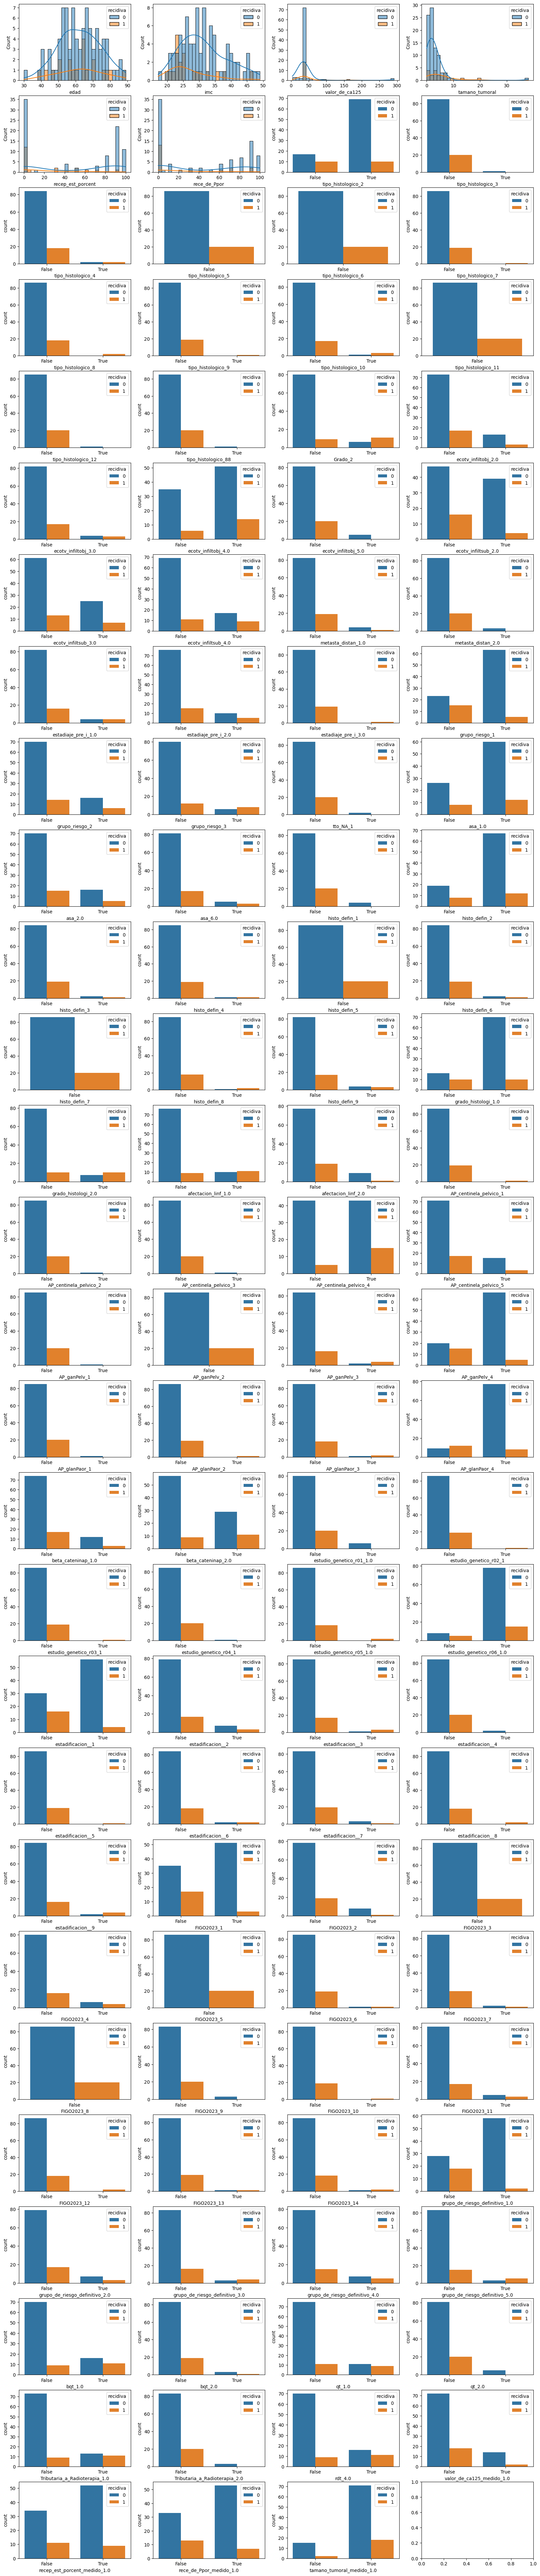

In [232]:
cols = X_train_ohe.columns

fig, axes = plt.subplots(1 + len(cols) // 4, 4, figsize=(20, 100))

for i, val in enumerate(cols):
    ax = axes.flatten()[i]

    if X_train_ohe[val].dtype == "category":
        sns.countplot(
            data=X_train_ohe,
            x=val,
            hue=y_train,
            ax=ax
        )
    else:
        sns.histplot(
            data=X_train_ohe,
            x=val,
            hue=y_train,
            bins=30,
            kde=True,
            ax=ax
)
    

In [233]:
std = StandardScaler()

X_train_std = X_train_ohe.copy()
X_train_std[cols] = std.fit_transform(X_train_std[cols])

In [234]:
X_train_std.describe().T

count          mean       std       min  \
edad                          106.0  1.942890e-16  1.004751 -2.656174   
imc                           106.0 -6.954605e-16  1.004751 -1.836259   
valor_de_ca125                106.0  6.860340e-17  1.004751 -0.987470   
tamano_tumoral                106.0  8.379042e-18  1.004751 -0.704486   
recep_est_porcent             106.0  5.970067e-17  1.004751 -1.020236   
...                             ...           ...       ...       ...   
rdt_4.0                       106.0 -9.845374e-17  1.004751 -0.584613   
valor_de_ca125_medido_1.0     106.0 -1.047380e-18  1.004751 -0.421637   
recep_est_porcent_medido_1.0  106.0  1.675808e-17  1.004751 -1.164283   
rece_de_Ppor_medido_1.0       106.0  1.885284e-17  1.004751 -1.142080   
tamano_tumoral_medido_1.0     106.0 -1.246382e-16  1.004751 -2.288077   

                                   25%       50%       75%       max  
edad                         -0.686688  0.051869  0.687849  2.185479  
imc                          -0.754652 -0.172249  0.545356  2.573368  
valor_de_ca125               -0.157120 -0.157120 -0.157120  6.642194  
tamano_tumoral               -0.529541 -0.196581  0.198455  7.873459  
recep_est_porcent            -1.020236 -0.076974  1.102104  1.337920  
...                                ...       ...       ...       ...  
rdt_4.0                      -0.584613 -0.584613  1.136747  1.710534  
valor_de_ca125_medido_1.0    -0.421637 -0.421637 -0.421637  2.371708  
recep_est_porcent_medido_1.0 -1.164283  0.858898  0.858898  0.858898  
rece_de_Ppor_medido_1.0      -1.142080  0.875595  0.875595  0.875595  
tamano_tumoral_medido_1.0     0.437048  0.437048  0.437048  0.437048  

[111 rows x 8 columns]

In [235]:
pca_recidiva = PCA().fit(X_train_std[cols]);

print(pca_recidiva.explained_variance_ratio_)
print(pca_recidiva.explained_variance_ratio_.cumsum())

[1.26371798e-01 7.05985297e-02 5.15208870e-02 4.52927732e-02
 4.13800478e-02 3.88868510e-02 3.63535329e-02 3.32936425e-02
 3.24857168e-02 2.88939699e-02 2.84623673e-02 2.72782503e-02
 2.59042845e-02 2.37231282e-02 2.33265835e-02 2.23887001e-02
 2.02117262e-02 1.89723450e-02 1.81590436e-02 1.74508569e-02
 1.63491656e-02 1.54245841e-02 1.49048157e-02 1.40540001e-02
 1.32183058e-02 1.29055561e-02 1.24423782e-02 1.14303892e-02
 1.09927733e-02 1.04492324e-02 9.85689474e-03 8.99017120e-03
 8.56884419e-03 8.33644838e-03 7.45527529e-03 7.07429102e-03
 6.91376149e-03 6.64376613e-03 6.27903667e-03 5.54732589e-03
 5.29111791e-03 4.80763402e-03 4.27244604e-03 4.11560383e-03
 3.88966185e-03 3.65041471e-03 3.57250159e-03 2.94805260e-03
 2.50367107e-03 2.40525614e-03 2.09422875e-03 2.00266472e-03
 1.95117117e-03 1.76408735e-03 1.70732691e-03 1.48228846e-03
 1.43230510e-03 1.34220147e-03 1.09424597e-03 9.80344194e-04
 9.50555751e-04 8.12747598e-04 7.91525209e-04 7.79444217e-04
 6.30974968e-04 6.143148

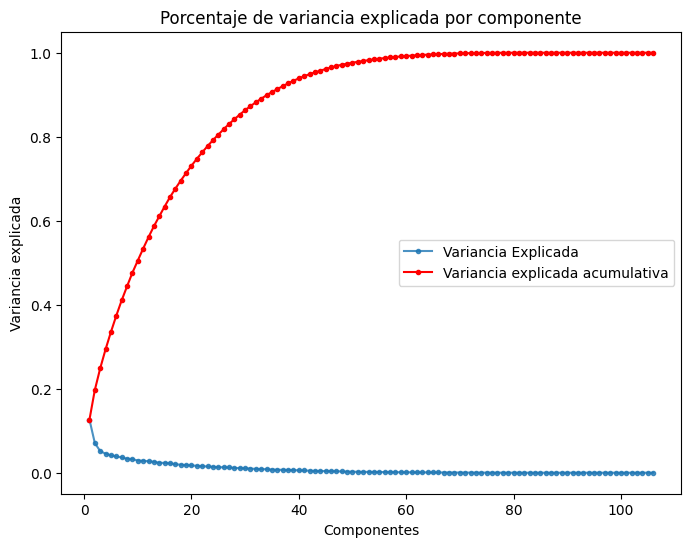

In [236]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca_recidiva.explained_variance_ratio_ )+1),pca_recidiva.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca_recidiva.explained_variance_ratio_ )+1),
         np.cumsum(pca_recidiva.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

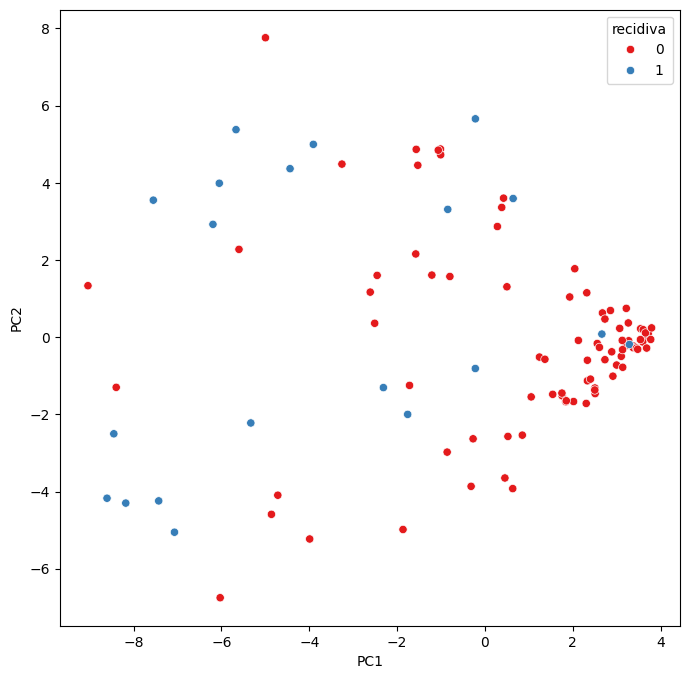

In [237]:
train_pca = pca_recidiva.transform(X_train_std[cols])
X_train_std[['PC1','PC2', 'PC3']] = train_pca[:,:3]
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=X_train_std, palette="Set1")

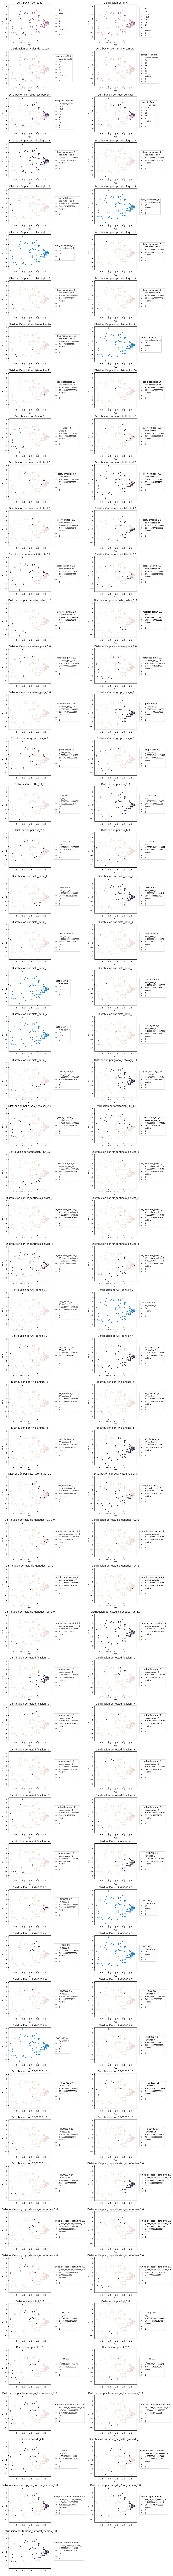

In [238]:
fig, axes = plt.subplots(1 + len(cols) // 2, 2, figsize=(12, 180), constrained_layout=True)

for i, var in enumerate(cols):
    ax = axes.flatten()[i]
    scatter = sns.scatterplot(
        x='PC1', 
        y='PC2', 
        hue=var,
        style=y_train,
        data=X_train_std, 
        ax=ax
    ).set(
        title=f'Distribución por {var}', 
        xlabel='PC1', 
        ylabel='PC2'
    )

    ax.legend(
        loc='center left',
        bbox_to_anchor=(1.05, 0.5),
        title=var,
        fontsize='small'
    )

for j in range(len(cols), axes.size):
    fig.delaxes(axes.flatten()[j])

### Entrenamiento

In [239]:
X_test_ohe = pd.get_dummies(X_test, columns=categoricas, prefix=categoricas, drop_first=True)

cols_ohe = X_test_ohe.select_dtypes(include=["bool"]).columns
X_test_ohe[cols_ohe] = X_test_ohe[cols_ohe].astype("category")

X_test_ohe.head()

edad   imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
72  74.0  43.0            35.0             2.0               20.0   
43  64.0  26.6            35.0             4.0               90.0   
57  60.0  25.4            35.0             1.5                0.0   
78  77.0  22.8            35.0             3.0               90.0   
25  66.0  37.8            35.0             3.8               90.0   

    rece_de_Ppor tipo_histologico_2 tipo_histologico_3 tipo_histologico_4  \
72          30.0               True              False              False   
43          90.0               True              False              False   
57           0.0               True              False              False   
78          90.0               True              False              False   
25          90.0               True              False              False   

   tipo_histologico_5  ... bqt_2.0 qt_1.0 qt_2.0  \
72              False  ...   False  False  False   
43              False  ...   False  False  False   
57              False  ...   False  False  False   
78              False  ...   False   True  False   
25              False  ...   False  False  False   

   Tributaria_a_Radioterapia_1.0 Tributaria_a_Radioterapia_2.0 rdt_4.0  \
72                         False                         False   False   
43                         False                         False   False   
57                         False                         False   False   
78                          True                         False    True   
25                         False                         False   False   

   valor_de_ca125_medido_1.0 recep_est_porcent_medido_1.0  \
72                     False                         True   
43                     False                         True   
57                     False                        False   
78                     False                         True   
25                     False                         True   

   rece_de_Ppor_medido_1.0 tamano_tumoral_medido_1.0  
72                    True                      True  
43                    True                      True  
57                   False                      True  
78                    True                      True  
25                    True                      True  

[5 rows x 111 columns]

In [240]:
X_test_std = X_test_ohe.copy()
X_test_std[cols] = std.transform(X_test_std[cols])
X_test_std.describe().T

count      mean       std       min       25%  \
edad                           46.0  0.119660  1.090227 -2.409988 -0.584110   
imc                            46.0  0.039069  1.122002 -1.905592 -0.839239   
valor_de_ca125                 46.0  0.857489  5.803827 -0.563010 -0.157120   
tamano_tumoral                 46.0 -0.067323  0.898328 -0.704486 -0.689813   
recep_est_porcent              46.0 -0.015457  1.026916 -1.020236 -1.020236   
...                             ...       ...       ...       ...       ...   
rdt_4.0                        46.0  0.113910  1.067737 -0.584613 -0.584613   
valor_de_ca125_medido_1.0      46.0 -0.118013  0.879056 -0.421637 -0.421637   
recep_est_porcent_medido_1.0   46.0 -0.064729  1.018894 -1.164283 -1.164283   
rece_de_Ppor_medido_1.0        46.0 -0.089380  1.019021 -1.142080 -1.142080   
tamano_tumoral_medido_1.0      46.0 -0.214612  1.175254 -2.288077  0.437048   

                                   50%       75%        max  
edad                          0.174962  0.872488   2.431665  
imc                          -0.130648  0.774157   3.557907  
valor_de_ca125               -0.157120 -0.157120  38.359949  
tamano_tumoral               -0.253015  0.187169   3.584486  
recep_est_porcent            -0.312789  1.102104   1.337920  
...                                ...       ...        ...  
rdt_4.0                      -0.584613  1.710534   1.710534  
valor_de_ca125_medido_1.0    -0.421637 -0.421637   2.371708  
recep_est_porcent_medido_1.0  0.858898  0.858898   0.858898  
rece_de_Ppor_medido_1.0       0.875595  0.875595   0.875595  
tamano_tumoral_medido_1.0     0.437048  0.437048   0.437048  

[111 rows x 8 columns]

In [241]:
test_pca = pca_recidiva.transform(X_test_std[cols])
X_test_std[['PC1','PC2', 'PC3']] = test_pca[:,:3]

In [242]:
norm = MinMaxScaler()
X_train_norm = X_train_ohe.copy()
X_train_norm[cols] = norm.fit_transform(X_train_norm[cols])
X_train_norm.head()

edad       imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
95  0.677966  0.179245        0.313282        0.052632               0.00   
20  0.423729  0.440252        0.108832        0.026316               0.90   
81  0.355932  0.452830        0.108832        0.010526               0.00   
84  0.576271  0.119497        0.108832        0.197368               0.01   
47  0.610169  0.632075        0.071280        0.065789               0.00   

    rece_de_Ppor  tipo_histologico_2  tipo_histologico_3  tipo_histologico_4  \
95           0.0                 1.0                 0.0                 0.0   
20           0.9                 1.0                 0.0                 0.0   
81           0.0                 1.0                 0.0                 0.0   
84           0.0                 0.0                 0.0                 0.0   
47           0.0                 1.0                 0.0                 0.0   

    tipo_histologico_5  ...  bqt_2.0  qt_1.0  qt_2.0  \
95                 0.0  ...      0.0     0.0     0.0   
20                 0.0  ...      0.0     0.0     0.0   
81                 0.0  ...      0.0     0.0     0.0   
84                 0.0  ...      0.0     1.0     0.0   
47                 0.0  ...      0.0     0.0     0.0   

    Tributaria_a_Radioterapia_1.0  Tributaria_a_Radioterapia_2.0  rdt_4.0  \
95                            1.0                            0.0      1.0   
20                            0.0                            0.0      0.0   
81                            0.0                            0.0      0.0   
84                            1.0                            0.0      1.0   
47                            0.0                            0.0      0.0   

    valor_de_ca125_medido_1.0  recep_est_porcent_medido_1.0  \
95                        1.0                           0.0   
20                        0.0                           1.0   
81                        0.0                           0.0   
84                        0.0                           1.0   
47                        1.0                           0.0   

    rece_de_Ppor_medido_1.0  tamano_tumoral_medido_1.0  
95                      0.0                        1.0  
20                      1.0                        1.0  
81                      0.0                        1.0  
84                      0.0                        1.0  
47                      0.0                        1.0  

[5 rows x 111 columns]

In [243]:
X_test_norm = X_test_ohe.copy()
X_test_norm[cols] = norm.transform(X_test_norm[cols])
X_test_norm.head()

edad       imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
72  0.745763  0.811321        0.108832        0.052632                0.2   
43  0.576271  0.295597        0.108832        0.105263                0.9   
57  0.508475  0.257862        0.108832        0.039474                0.0   
78  0.796610  0.176101        0.108832        0.078947                0.9   
25  0.610169  0.647799        0.108832        0.100000                0.9   

    rece_de_Ppor  tipo_histologico_2  tipo_histologico_3  tipo_histologico_4  \
72           0.3                 1.0                 0.0                 0.0   
43           0.9                 1.0                 0.0                 0.0   
57           0.0                 1.0                 0.0                 0.0   
78           0.9                 1.0                 0.0                 0.0   
25           0.9                 1.0                 0.0                 0.0   

    tipo_histologico_5  ...  bqt_2.0  qt_1.0  qt_2.0  \
72                 0.0  ...      0.0     0.0     0.0   
43                 0.0  ...      0.0     0.0     0.0   
57                 0.0  ...      0.0     0.0     0.0   
78                 0.0  ...      0.0     1.0     0.0   
25                 0.0  ...      0.0     0.0     0.0   

    Tributaria_a_Radioterapia_1.0  Tributaria_a_Radioterapia_2.0  rdt_4.0  \
72                            0.0                            0.0      0.0   
43                            0.0                            0.0      0.0   
57                            0.0                            0.0      0.0   
78                            1.0                            0.0      1.0   
25                            0.0                            0.0      0.0   

    valor_de_ca125_medido_1.0  recep_est_porcent_medido_1.0  \
72                        0.0                           1.0   
43                        0.0                           1.0   
57                        0.0                           0.0   
78                        0.0                           1.0   
25                        0.0                           1.0   

    rece_de_Ppor_medido_1.0  tamano_tumoral_medido_1.0  
72                      1.0                        1.0  
43                      1.0                        1.0  
57                      0.0                        1.0  
78                      1.0                        1.0  
25                      1.0                        1.0  

[5 rows x 111 columns]

In [244]:
lr= LogisticRegression(max_iter=10000, penalty="l1", solver="saga")
param = {'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_norm, y_train);

In [245]:
display(HTML(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

In [246]:
X_test_norm.columns == X_train_norm.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

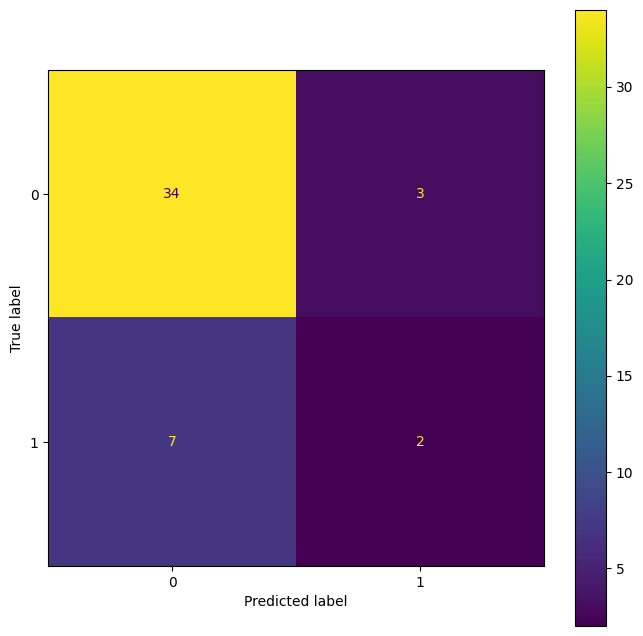

In [247]:
plt.figure(figsize=(8,8));

logistic_model = LogisticRegression(max_iter=10000, penalty="l1", solver="saga", C=1.9952623149688788).fit(X_train_norm, y_train)

ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_norm, y_test, ax=plt.subplot());

Coefs:


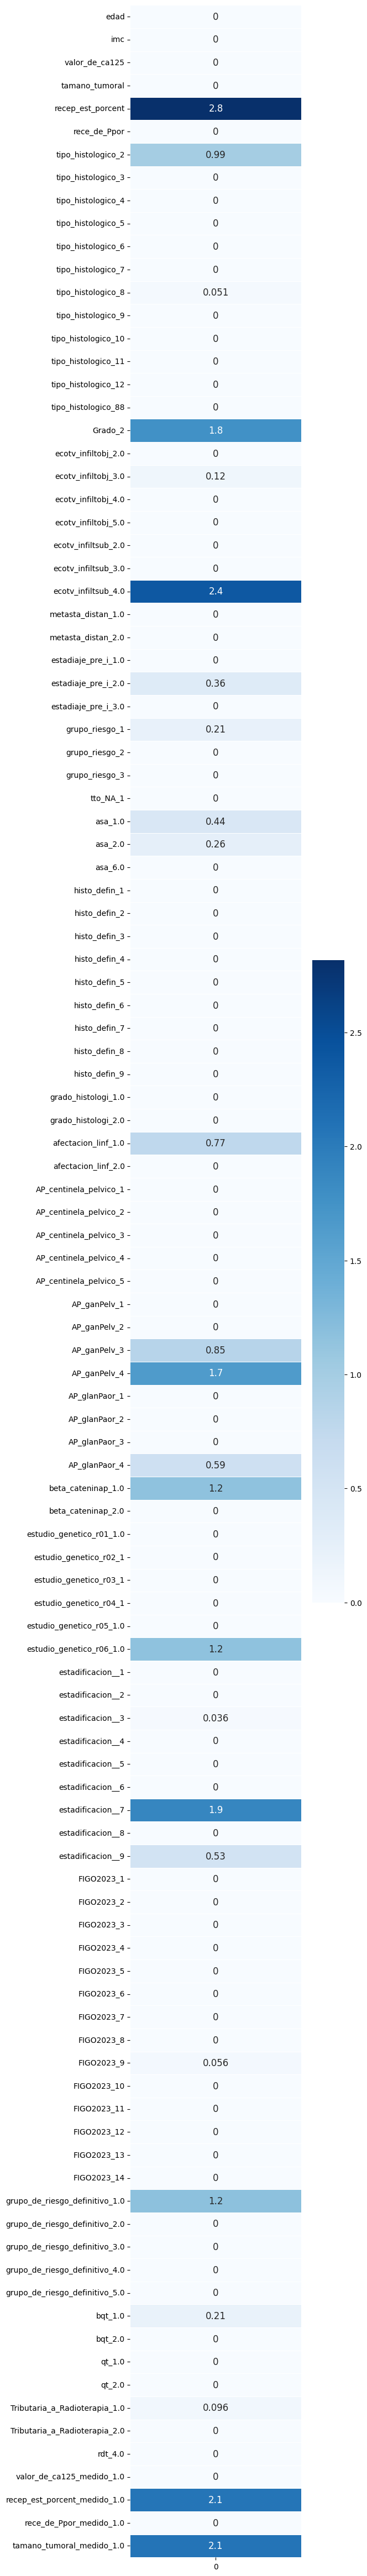

In [248]:
print('Coefs:')
coefs = pd.DataFrame(logistic_model.coef_)
coefs.columns = X_train_norm.columns

plt.figure(figsize=(5,60));
sns.heatmap(coefs.abs().T,annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12});

In [249]:
rfecv = RFECV(estimator=logistic_model, step=1, cv=StratifiedKFold(3), scoring="accuracy", n_jobs=-1)
rfecv.fit(X_train_norm, y_train)

print("Número óptimo de características: ", rfecv.n_features_)
print("Mejores características: ", rfecv.support_)

Número óptimo de características:  13
Mejores características:  [False False False False  True False  True False False False False False
 False False False False False False  True False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False  True
 False False False  True  True False False False False False False  True
 False False False False False False  True False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
  True False  True]


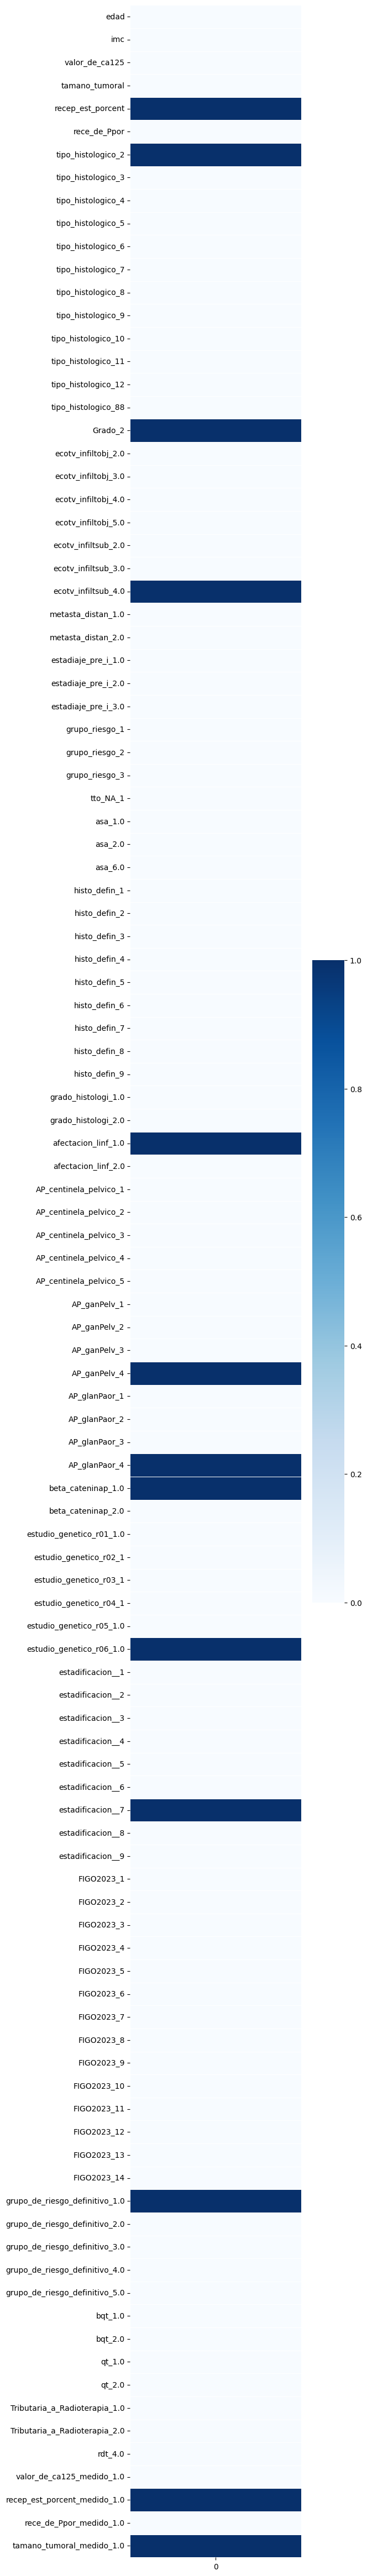

In [250]:
figure = plt.figure(figsize=(5, 60))
sns.heatmap(np.array([rfecv.support_]).T, linewidths=.5, yticklabels=cols, cmap='Blues', annot_kws={'size':12});

In [251]:
X_train_elim = X_train_norm.loc[:, rfecv.support_]
X_test_elim = X_test_norm.loc[:, rfecv.support_]
X_train_elim.describe().T

count      mean       std  min   25%  50%  \
recep_est_porcent               106.0  0.432642  0.426075  0.0  0.00  0.4   
tipo_histologico_2              106.0  0.745283  0.437772  0.0  0.25  1.0   
Grado_2                         106.0  0.160377  0.368699  0.0  0.00  0.0   
ecotv_infiltsub_4.0             106.0  0.245283  0.432299  0.0  0.00  0.0   
afectacion_linf_1.0             106.0  0.198113  0.400471  0.0  0.00  0.0   
AP_ganPelv_4                    106.0  0.669811  0.472515  0.0  0.00  1.0   
AP_glanPaor_4                   106.0  0.801887  0.400471  0.0  1.00  1.0   
beta_cateninap_1.0              106.0  0.141509  0.350202  0.0  0.00  0.0   
estudio_genetico_r06_1.0        106.0  0.877358  0.329584  0.0  1.00  1.0   
estadificacion__7               106.0  0.037736  0.191462  0.0  0.00  0.0   
grupo_de_riesgo_definitivo_1.0  106.0  0.566038  0.497974  0.0  0.00  1.0   
recep_est_porcent_medido_1.0    106.0  0.575472  0.496619  0.0  0.00  1.0   
tamano_tumoral_medido_1.0       106.0  0.839623  0.368699  0.0  1.00  1.0   

                                75%  max  
recep_est_porcent               0.9  1.0  
tipo_histologico_2              1.0  1.0  
Grado_2                         0.0  1.0  
ecotv_infiltsub_4.0             0.0  1.0  
afectacion_linf_1.0             0.0  1.0  
AP_ganPelv_4                    1.0  1.0  
AP_glanPaor_4                   1.0  1.0  
beta_cateninap_1.0              0.0  1.0  
estudio_genetico_r06_1.0        1.0  1.0  
estadificacion__7               0.0  1.0  
grupo_de_riesgo_definitivo_1.0  1.0  1.0  
recep_est_porcent_medido_1.0    1.0  1.0  
tamano_tumoral_medido_1.0       1.0  1.0

In [252]:
lr= LogisticRegression(max_iter=10000, penalty="l1", solver="saga")
param = {'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_elim, y_train);

In [253]:
display(HTML(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

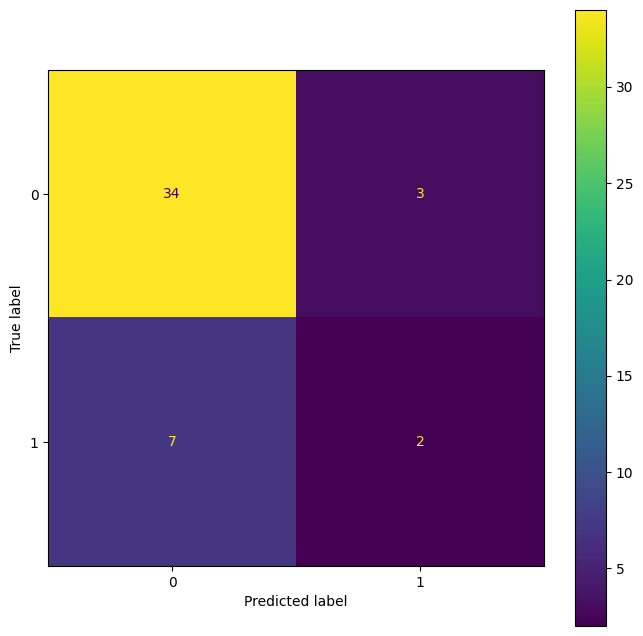

In [254]:
plt.figure(figsize=(8,8));

logistic_model = LogisticRegression(max_iter=10000, penalty="l1", solver="saga", C=1.9952623149688788).fit(X_train_elim, y_train)

ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_elim, y_test, ax=plt.subplot());

In [255]:
# 1. Definir la cuadrícula de hiperparámetros a probar
# Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
param_grid = {
    # Número de árboles en el bosque
    'n_estimators': [100, 200, 300], 
    
    # Profundidad máxima de cada árbol
    'max_depth': [None, 10, 20], 
    
    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_split': [2, 5], 
    
    # Número mínimo de muestras requeridas en cada nodo hoja
    'min_samples_leaf': [1, 2],
    
    # Función para medir la calidad de una división
    'criterion': ['gini', 'entropy']
}

# 2. Inicializar el modelo base
base_model = RandomForestClassifier(random_state=42)

# 3. Inicializar el GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,      # El modelo que queremos optimizar
    param_grid=param_grid,     # El diccionario de hiperparámetros
    scoring='accuracy',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
    cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
    verbose=2,                 # Nivel de detalle de la salida (2 es bueno)
    n_jobs=-1                  # Usar todos los núcleos del procesador para acelerar
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula...")
grid_search.fit(X_train_norm, y_train)

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samp

In [256]:
display(HTML(pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

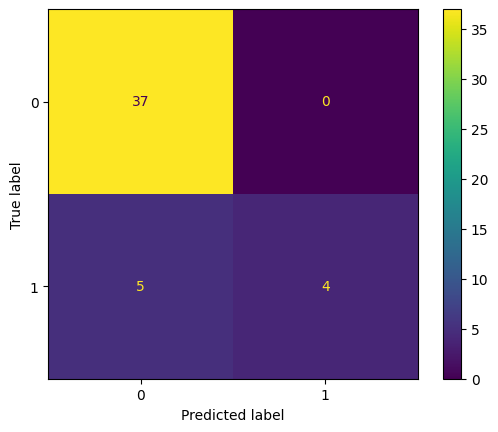

In [257]:
model_rf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_leaf=1, min_samples_split=5, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_norm, y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_norm, y_test, ax=plt.subplot());

In [258]:
# 1. Definir la cuadrícula de hiperparámetros a probar
# Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
param_grid = {
    # Número de árboles en el bosque
    'n_estimators': [100, 200, 300], 
    
    # Profundidad máxima de cada árbol
    'max_depth': [None, 10, 20], 
    
    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_split': [2, 5], 
    
    # Número mínimo de muestras requeridas en cada nodo hoja
    'min_samples_leaf': [1, 2],
    
    # Función para medir la calidad de una división
    'criterion': ['gini', 'entropy']
}

# 2. Inicializar el modelo base
base_model = RandomForestClassifier(random_state=42)

# 3. Inicializar el GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,      # El modelo que queremos optimizar
    param_grid=param_grid,     # El diccionario de hiperparámetros
    scoring='accuracy',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
    cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
    verbose=2,                 # Nivel de detalle de la salida (2 es bueno)
    n_jobs=-1                  # Usar todos los núcleos del procesador para acelerar
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula...")
grid_search.fit(X_train_elim, y_train)

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samp

In [259]:
display(HTML(pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

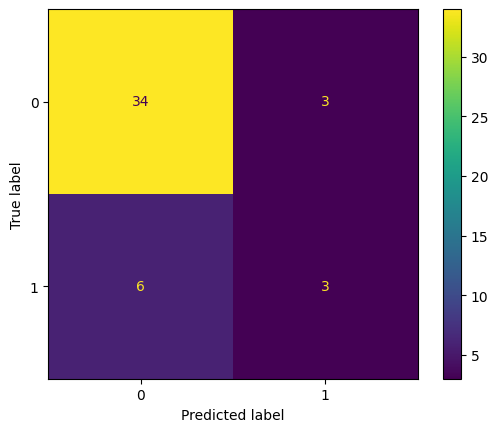

In [260]:
model_rf = RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_elim, y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_elim, y_test, ax=plt.subplot());

In [261]:
param_grid = {
    # Coeficiente de regularización C (potencias de 10)
    'C': [0.1, 1, 10, 100], 
    
    # Coeficiente del kernel gamma (potencias de 10, incluyendo 'scale' que es heurística)
    'gamma': [0.001, 0.01, 0.1, 'scale'], 
    
    # Tipo de kernel a probar
    'kernel': ['rbf', "poly", "sigmoid"],

    'degree': [2, 3, 4],

    'class_weight': ["balanced", None]
}

svm_model = SVC(random_state=42, probability=True)

# 3. Inicializar el GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm_model,        # Le pasamos el Pipeline
    param_grid=param_grid,     
    scoring='f1',        # La métrica a optimizar (ajusta si necesitas 'recall', 'f1', etc.)
    cv=5,                      
    verbose=2,                 
    n_jobs=-1                  
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula para SVM...")
# Entrenamos con los datos sin escalar (el Pipeline se encarga de escalarlos internamente)
grid_search_svm.fit(X_train_norm, y_train) 

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula para SVM...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, g

In [262]:
display(HTML(pd.DataFrame(grid_search_svm.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

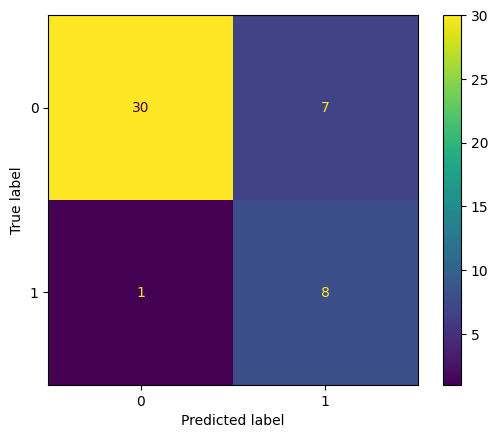

In [263]:
model_rf = SVC(C=1, gamma=0.1, kernel="sigmoid", class_weight="balanced", degree=3, probability=True, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_norm, y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_norm, y_test, ax=plt.subplot());

In [264]:
param_grid = {
    # Coeficiente de regularización C (potencias de 10)
    'C': [0.1, 1, 10, 100], 
    
    # Coeficiente del kernel gamma (potencias de 10, incluyendo 'scale' que es heurística)
    'gamma': [0.001, 0.01, 0.1, 'scale'], 
    
    # Tipo de kernel a probar
    'kernel': ['rbf'] 
}

svm_model = SVC(random_state=42, probability=True)

# 3. Inicializar el GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm_model,        # Le pasamos el Pipeline
    param_grid=param_grid,     
    scoring='accuracy',        # La métrica a optimizar (ajusta si necesitas 'recall', 'f1', etc.)
    cv=5,                      
    verbose=2,                 
    n_jobs=-1                  
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula para SVM...")
# Entrenamos con los datos sin escalar (el Pipeline se encarga de escalarlos internamente)
grid_search_svm.fit(X_train_elim, y_train) 

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula para SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV

In [265]:
display(HTML(pd.DataFrame(grid_search_svm.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

In [266]:
# 1. Definir la cuadrícula de hiperparámetros a probar
# Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
param_grid = {
    # Número de árboles en el bosque
    'n_estimators': [100, 200, 300], 
    
    # Profundidad máxima de cada árbol
    'max_depth': [None, 10, 20], 
    
    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_split': [2, 5], 
    
    # Número mínimo de muestras requeridas en cada nodo hoja
    'min_samples_leaf': [1, 2],
    
    # Función para medir la calidad de una división
    'criterion': ['gini', 'entropy']
}

# 2. Inicializar el modelo base
base_model = RandomForestClassifier(random_state=42)

# 3. Inicializar el GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,      # El modelo que queremos optimizar
    param_grid=param_grid,     # El diccionario de hiperparámetros
    scoring='accuracy',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
    cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
    verbose=2,                 # Nivel de detalle de la salida (2 es bueno)
    n_jobs=-1                  # Usar todos los núcleos del procesador para acelerar
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula...")
grid_search.fit(X_train_std[["PC1", "PC2", "PC3"]], y_train)

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samp

In [267]:
display(HTML(pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

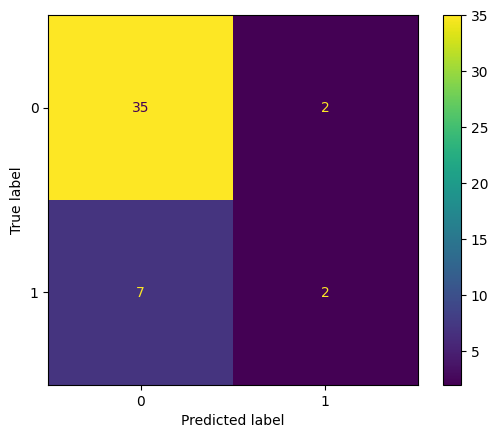

In [268]:
model_rf = RandomForestClassifier(n_estimators=300, criterion="entropy", max_depth=10, min_samples_leaf=2, min_samples_split=5, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_std[["PC1", "PC2", "PC3"]], y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_std[["PC1", "PC2", "PC3"]], y_test, ax=plt.subplot());

In [269]:
test_pca = pca_recidiva.transform(X_test_std[cols])
X_test_std[['PC1','PC2', 'PC3']] = test_pca[:,:3]

In [270]:
def random_forest_test(X_train_func, y_train_func):
    # 1. Definir la cuadrícula de hiperparámetros a probar
    # Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
    param_grid = {
        # Número de árboles en el bosque
        'n_estimators': [100, 200, 300], 
        
        # Profundidad máxima de cada árbol
        'max_depth': [None, 10, 20], 
        
        # Número mínimo de muestras requeridas para dividir un nodo interno
        'min_samples_split': [2, 5], 
        
        # Número mínimo de muestras requeridas en cada nodo hoja
        'min_samples_leaf': [1, 2],
        
        # Función para medir la calidad de una división
        'criterion': ['gini', 'entropy']
    }

    # 2. Inicializar el modelo base
    base_model = RandomForestClassifier(random_state=42)

    # 3. Inicializar el GridSearchCV
    grid_search = GridSearchCV(
        estimator=base_model,      # El modelo que queremos optimizar
        param_grid=param_grid,     # El diccionario de hiperparámetros
        scoring='f1',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
        cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
        verbose=0,                 # Nivel de detalle de la salida (2 es bueno)
        n_jobs=-1                 # Usar todos los núcleos del procesador para acelerar
    )

    # 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
    print("Iniciando búsqueda en cuadrícula...")
    grid_search.fit(X_train_func, y_train_func)

    print("Búsqueda finalizada.")

    return (pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score')).iloc[1]["params"]

    

In [271]:
def svm_test(X_train_func, y_train_func):
    param_grid = {
        # Coeficiente de regularización C (potencias de 10)
        'C': [0.1, 1, 10, 100], 
        
        # Coeficiente del kernel gamma (potencias de 10, incluyendo 'scale' que es heurística)
        'gamma': [0.001, 0.01, 0.1, 'scale'], 
        
        # Tipo de kernel a probar
        'kernel': ['rbf', "poly", "sigmoid"],

        'degree': [1, 2, 3],

        'class_weight': ["balanced", None]
    }

    svm_model = SVC(random_state=42, probability=True)

    # 3. Inicializar el GridSearchCV
    grid_search_svm = GridSearchCV(
        estimator=svm_model,        # Le pasamos el Pipeline
        param_grid=param_grid,     
        scoring='f1',        # La métrica a optimizar (ajusta si necesitas 'recall', 'f1', etc.)
        cv=5,                      
        verbose=0,                 
        n_jobs=-1              
    )

    # 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
    print("Iniciando búsqueda en cuadrícula para SVM...")
    # Entrenamos con los datos sin escalar (el Pipeline se encarga de escalarlos internamente)
    grid_search_svm.fit(X_train_func, y_train_func) 

    print("Búsqueda finalizada.")

    return (pd.DataFrame(grid_search_svm.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score')).iloc[1]["params"]


Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
2 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
3 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
4 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
5 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
6 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
7 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
8 componentes

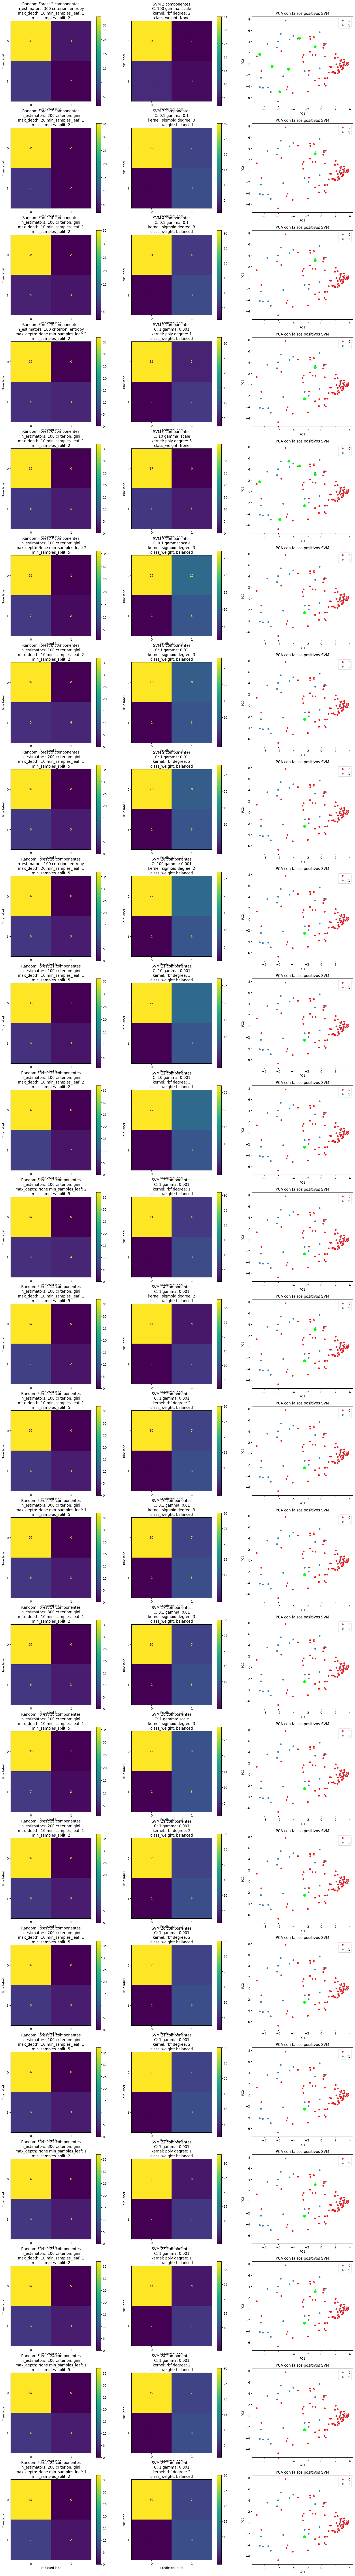

In [284]:
fig, axes = plt.subplots(24, 3, figsize=(20, 150))


for i in range(2, 26):
    ax_rf = axes[i - 2][0]
    ax_svm = axes[i - 2][1]
    ax_pca = axes[i - 2][2]

    params_rf = random_forest_test(train_pca[:, :i], y_train)
    ax_rf.set_title(f"Random Forest {i} componentes\nn_estimators: {params_rf["n_estimators"]} criterion: {params_rf["criterion"]}\nmax_depth: {params_rf["max_depth"]} min_samples_leaf: {params_rf["min_samples_leaf"]}\nmin_samples_split: {params_rf["min_samples_split"]}")

    params_svm = svm_test(train_pca[:, :i], y_train)
    ax_svm.set_title(f"SVM {i} componentes\nC: {params_svm["C"]} gamma: {params_svm["gamma"]}\nkernel: {params_svm["kernel"]} degree: {params_svm["degree"]}\nclass_weight: {params_svm["class_weight"]}")

    ax_pca.set_title("PCA con falsos positivos SVM")

    print(f"{i} componentes ready.")

    model_rf = RandomForestClassifier(n_estimators=params_rf["n_estimators"], criterion=params_rf["criterion"], max_depth=params_rf["max_depth"], min_samples_leaf=params_rf["min_samples_leaf"], min_samples_split=params_rf["min_samples_split"], random_state=42)
    model_rf.fit(train_pca[:, :i], y_train)
    ConfusionMatrixDisplay.from_estimator(model_rf, test_pca[:, :i], y_test, ax=ax_rf);

    model_svm = SVC(C=params_svm["C"], gamma=params_svm["gamma"], kernel=params_svm["kernel"], degree=params_svm["degree"], class_weight=params_svm["class_weight"], probability=True, random_state=42)
    model_svm.fit(train_pca[:, :i], y_train)
    ConfusionMatrixDisplay.from_estimator(model_svm, test_pca[:, :i], y_test, ax=ax_svm);

    y_pred = model_svm.predict(test_pca[:, :i])

    y_test_series = pd.Series(y_test, index=X_test.index)
    y_pred_series = pd.Series(y_pred, index=X_test.index)

    es_falso_positivo = (y_test_series == 1) & (y_pred_series == 0)

    df_falsos_positivos = pd.DataFrame(test_pca[:, :14][es_falso_positivo])

    _ = sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=X_train_std, palette="Set1", ax=ax_pca)
    _ = sns.scatterplot(x=0, y=1, data=df_falsos_positivos, color="lime", s=100, ax=ax_pca)

    

In [293]:
model_svm = SVC(C=1, gamma=0.001, kernel="sigmoid", degree=2, class_weight="balanced", probability=True, random_state=42)
model_svm.fit(train_pca[:, :14], y_train)


SVC(C=1, class_weight='balanced', degree=2, gamma=0.001, kernel='sigmoid',
    probability=True, random_state=42)

In [294]:
y_pred = model_svm.predict(test_pca[:, :14])

In [295]:
y_test_series = pd.Series(y_test, index=X_test.index)
y_pred_series = pd.Series(y_pred, index=X_test.index)

es_falso_positivo = (y_test_series == 1) & (y_pred_series == 0)

df_falsos_positivos = pd.DataFrame(test_pca[es_falso_positivo])

print(f"Número de Falsos Positivos encontrados: {df_falsos_positivos.shape[0]}")
print("\nPrimeros 5 Falsos Positivos:")
print(df_falsos_positivos.head())

Número de Falsos Positivos encontrados: 2

Primeros 5 Falsos Positivos:
        0         1         2         3         4         5         6    \
0 -0.865194  3.062010 -0.160704  0.686313 -2.252595 -1.318871  2.017396   
1 -2.347767 -2.542144 -2.735506  2.767514 -0.597772 -0.893198  0.415554   

        7         8         9    ...           96            97   \
0  0.722836 -1.041437  0.031116  ... -1.069115e-15  2.686299e-15   
1 -1.664589 -2.431235  0.312110  ...  5.298059e-01 -1.606573e+00   

            98            99            100           101           102  \
0 -5.918859e-16  2.438853e-15 -4.920368e-18 -1.710320e-15  1.687847e-15   
1  1.022258e+00 -1.646536e+00  6.824487e-01  9.051985e-01  3.792044e-01   

            103           104           105  
0 -3.039806e-16  1.763290e-15  3.550473e-16  
1 -1.251436e-01  5.361270e-01 -4.456606e-01  

[2 rows x 106 columns]


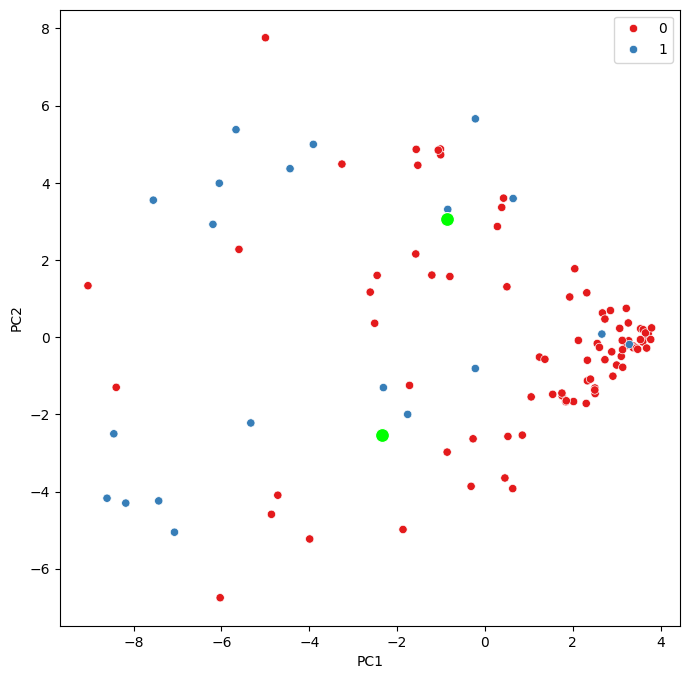

In [296]:
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=X_train_std, palette="Set1")
_ = sns.scatterplot(x=0, y=1, data=df_falsos_positivos, color="lime", s=100)

In [310]:
X_reconstr = pd.DataFrame(pca_recidiva.inverse_transform(df_falsos_positivos))
X_reconstr.columns = cols

error = 0.0001
error_df = abs(X_reconstr.iloc[0] - X_reconstr.iloc[1]) < error

error_df[error_df]

edad                        True
tipo_histologico_2          True
tipo_histologico_4          True
ecotv_infiltobj_2.0         True
ecotv_infiltobj_4.0         True
ecotv_infiltobj_5.0         True
ecotv_infiltsub_3.0         True
ecotv_infiltsub_4.0         True
estadiaje_pre_i_2.0         True
histo_defin_2               True
histo_defin_6               True
afectacion_linf_1.0         True
AP_centinela_pelvico_2      True
AP_ganPelv_3                True
beta_cateninap_1.0          True
estudio_genetico_r01_1.0    True
estudio_genetico_r04_1      True
estudio_genetico_r06_1.0    True
estadificacion__1           True
estadificacion__2           True
FIGO2023_5                  True
FIGO2023_8                  True
bqt_1.0                     True
qt_1.0                      True
qt_2.0                      True
dtype: bool